# Widgets 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dvf_loyers.csv", sep=";")

### Widget 1 : Rendement Locatif Brut par Arrondissement à Paris

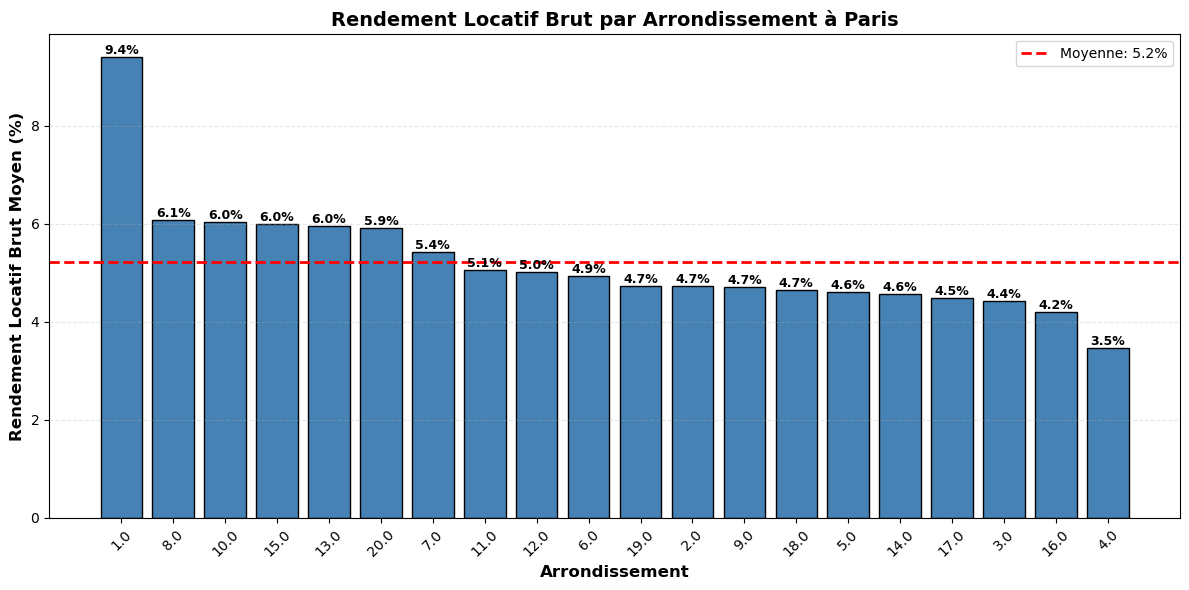

In [6]:
df['rendement_brut'] = (df['loyer_ref_m2'] * 12 * df['surface_reelle_bati']) / df['valeur_fonciere'] * 100

rendement_arr = df.groupby('arrondissement')['rendement_brut'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(rendement_arr.index.astype(str), rendement_arr.values, color='steelblue', edgecolor='black')

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Arrondissement', fontsize=12, fontweight='bold')
ax.set_ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
ax.set_title('Rendement Locatif Brut par Arrondissement à Paris', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=rendement_arr.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {rendement_arr.mean():.1f}%')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()